<a href="https://colab.research.google.com/github/Ebratul/practices/blob/main/GradientBoostingReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [147]:
np.random.seed(42)
x = np.random.rand(100,1) - 0.5
y = 3* x[:, 0]**2 + 0.05 *np.random.randn(100)

In [229]:
np.random.randn(100)

array([-0.01901621, -1.00252936, -0.01851314, -0.28865864,  0.32271856,
       -0.82723094,  0.51934651,  1.53273891, -0.10876015,  0.40171172,
        0.69014399, -0.40122047,  0.22409248,  0.0125924 ,  0.0976761 ,
       -0.77300978,  0.02451017,  0.49799829,  1.45114361,  0.95927083,
        2.15318246, -0.76734756,  0.87232064,  0.18334201,  2.18980293,
       -0.80829829, -0.83972184, -0.59939265, -2.12389572, -0.52575502,
       -0.75913266,  0.15039379,  0.34175598,  1.87617084,  0.95042384,
       -0.57690366, -0.89841467,  0.49191917, -1.32023321,  1.83145877,
        1.17944012, -0.46917565, -1.71313453,  1.35387237, -0.11453985,
        1.23781631, -1.59442766, -0.59937502,  0.0052437 ,  0.04698059,
       -0.45006547,  0.62284993, -1.06762043, -0.14237949,  0.12029563,
        0.51443883,  0.71161488, -1.12464209, -1.53411417,  1.27767682,
        0.33231401, -0.74848654,  1.55115198,  0.11567463,  1.17929718,
        0.06751848,  2.06074792,  1.75534084, -0.24896415,  0.97

In [148]:
df =  pd.DataFrame()

In [149]:
df['x'] = x.reshape(100)
df['y'] = y

In [150]:
df['x']

,x
0,-0.125460
1,0.450714
2,0.231994
3,0.098658
4,-0.343981
...,...
95,-0.006204
96,0.022733
97,-0.072459
98,-0.474581


In [151]:
df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'x vs y')

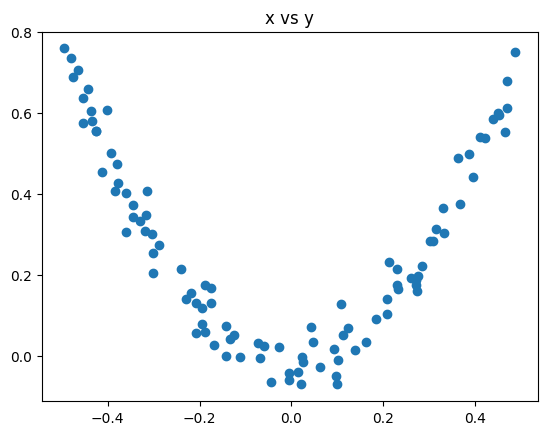

In [152]:
plt.scatter(df['x'], df['y'])
plt.title('x vs y')

In [153]:
df['pred1'] = df['y'].mean()

In [154]:
df

,x,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [155]:
df['res1'] = y - df['pred1']

In [156]:
df

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


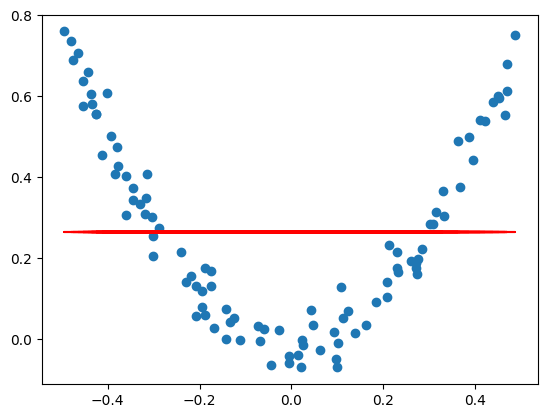

In [157]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['pred1'], '-r')

In [158]:
from sklearn.tree import DecisionTreeRegressor

In [159]:
# df['x'].values.reshape(100, 1)
# df[['x']]

In [160]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [161]:
tree1.fit(df[['x']], df['res1'])

DecisionTreeRegressor(max_leaf_nodes=8)

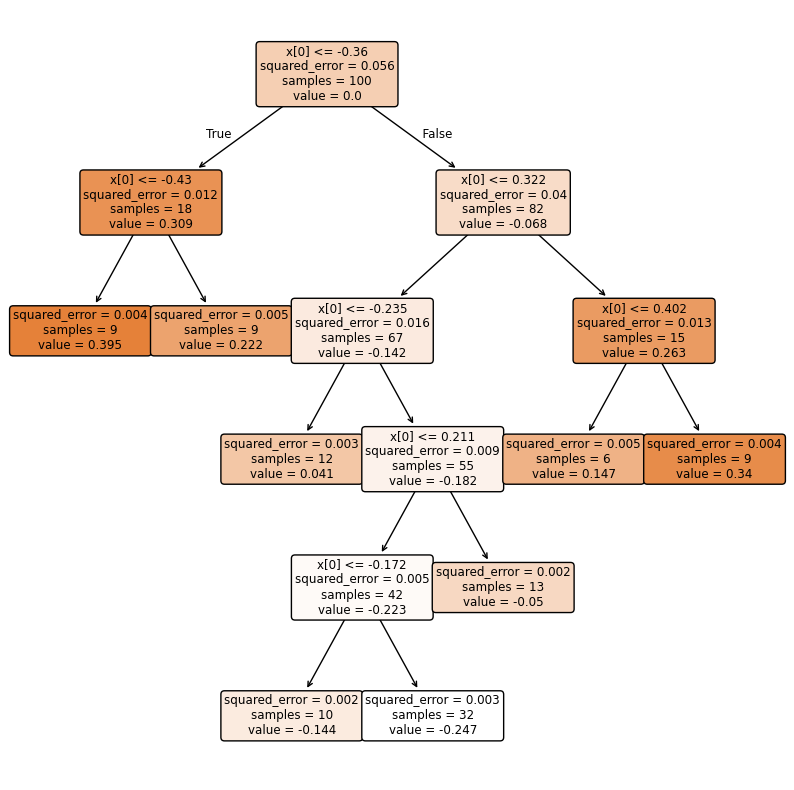

In [162]:
plt.figure(figsize=(10,10))
from sklearn.tree import plot_tree
plot_tree(tree1, filled= True,rounded=True)
plt.show()

In [163]:
x_test = np.linspace(-0.5, 0.5, 500)

In [164]:
# x_test.reshape(500, 1)
y_pred = 0.265458 + tree1.predict(x_test.reshape(-1,1)) #2d shape
# y_pred

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


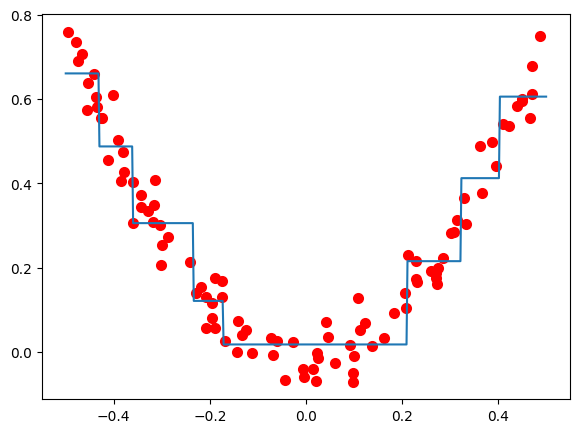

In [165]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_test, y_pred)
plt.scatter(df['x'], df['y'], linewidths=2, color = 'r')

In [166]:
df['pred2'] = 0.265458 + tree1.predict(df['x'].values.reshape(-1,1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [167]:
df

,x,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [168]:
df['res2'] = df['y'] - df['pred2']

In [169]:
df

,x,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [170]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df[['x']],df['res2'])

DecisionTreeRegressor(max_leaf_nodes=8)

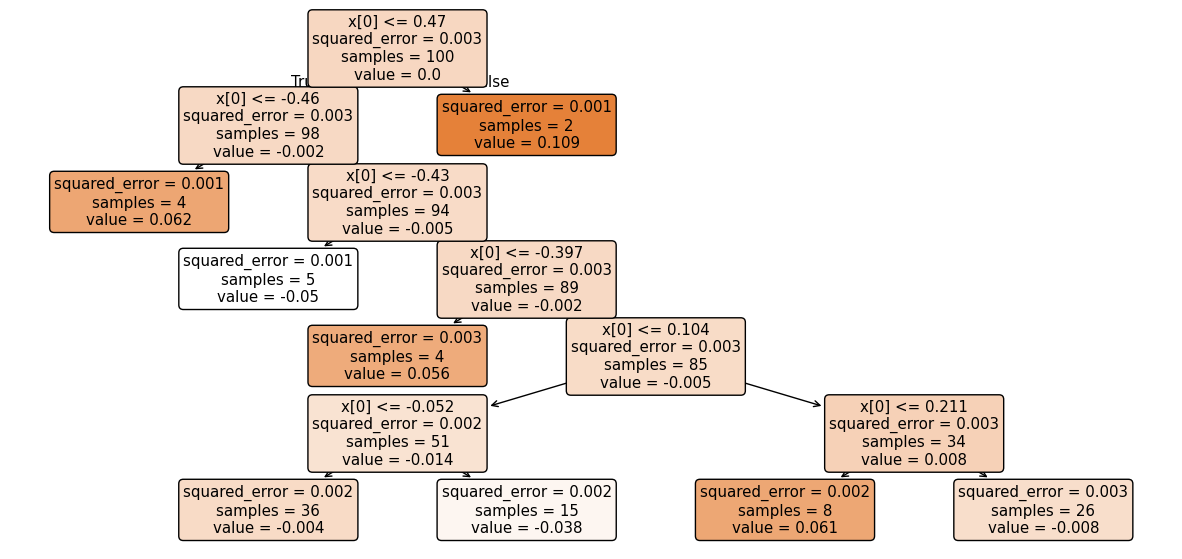

In [171]:
plt.figure(figsize=(15,7))
plot_tree(tree2,filled=True, rounded=True)
plt.show()

In [172]:
 y_pred = 0.265458 + sum(value.predict(x_test.reshape(-1,1)) for value in [tree1, tree2])
#  y_pred = 0.265458 + tree1.predict(X_test) + tree2.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


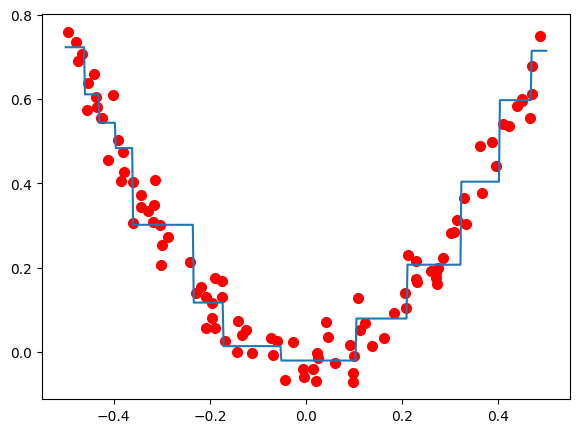

In [180]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_test, y_pred)
plt.scatter(df['x'], df['y'], linewidths=2, color = 'r')

In [224]:
def gradient_boost(x, y, number, lr, count=1, regs = [], foo = None):

  if number == 0:
    return
  else:
    if count > 1:
      y = y - regs[-1].predict(x)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(x, y)


    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * value.predict(x1.reshape(-1,1)) for value in regs)



    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)   # ঠিক
    plt.plot(x[:,0], foo, "r.")

    plt.show()

    gradient_boost(x, y , number -1 , lr, count + 1, regs, foo = foo)


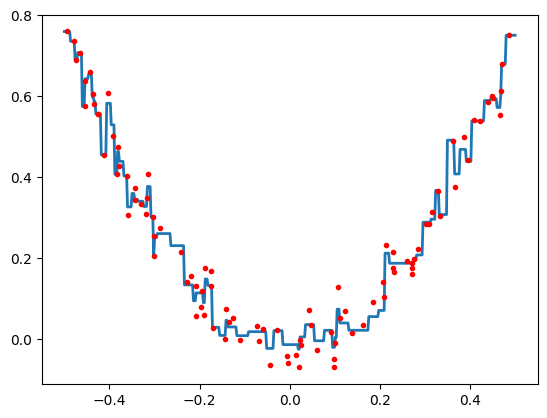

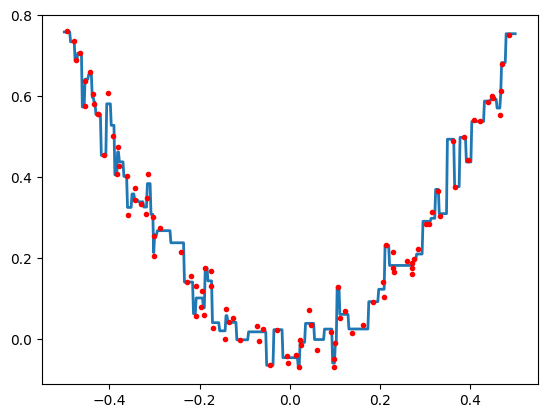

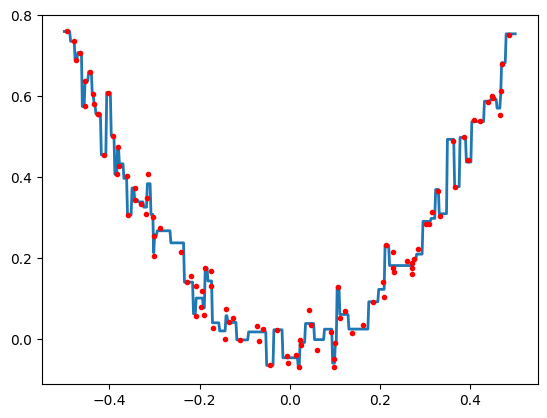

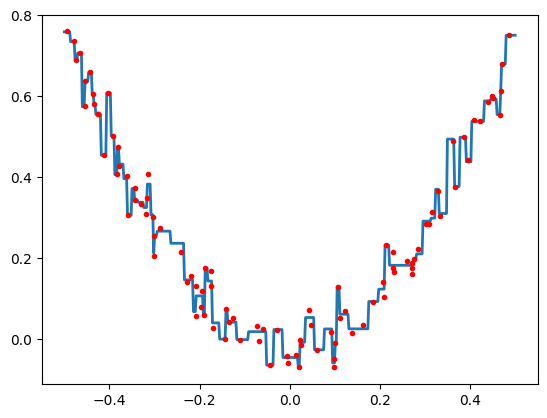

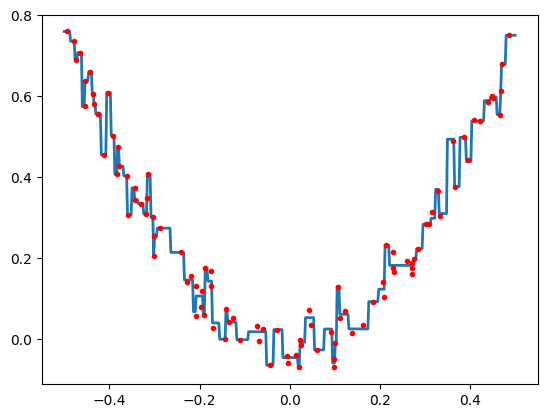

In [226]:
np.random.seed(42)
x = np.random.rand(100,1) - 0.5
y = 3*x[:,0]**2 + 0.05 * np.random.randn(100)
gradient_boost(x, y, 5,lr = 0.5)